In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import binom, ttest_ind
from tqdm import tqdm

# Сгенерированные данные. Представим, что моделируем экономику A/B в подписочном SaaS
pricing = np.array([0.99, 4.99, 9.99]) # цены в подписочной модели продукта

# Доля покупок по каждой цене. Представим гипотезу, в которой мы хотим увеличить долю
# платящих клиентов по самой дорогой цене, немного снизив долю по низкой
proportions_control = np.array([0.5, 0.4, 0.1]) 
proportions_test = np.array([0.49, 0.4, 0.11])

N = 10000
sizes = np.arange(1000, 10001, 1000)
simulations = 1000
sim_res = pd.DataFrame() 

np.random.seed(1)
control_pop = np.random.choice(pricing, N, p=proportions_control)
test_pop = np.random.choice(pricing, N, p=proportions_test)

for n in sizes: 
    
    control = control_pop[0:n]
    test = test_pop[0:n]
    
    for _ in range(0, simulations):
        
        # Рандомное присвоение групп A/B
        is_control = binom.rvs(1, 0.5, size=n)
        
        # Считаем p-value
        _, p = ttest_ind(control[is_control == True], test[is_control == False]) 

        # Кладем результат
        sim_res = sim_res.append({"n": n, "pvalue": p}, ignore_index=True)
        
def calculate_tpr(df, sim_num):
    names = {
        "tpr": sum(df['pvalue'] < 0.05) / sim_num
    }
    return pd.Series(names)
    
res = sim_res.groupby(["n"]).apply(calculate_tpr, sim_num=simulations).reset_index()

,n,tpr
0,1000.0,0.052
1,2000.0,0.008
2,3000.0,0.129
3,4000.0,0.118
4,5000.0,0.258
5,6000.0,0.282
6,7000.0,0.383
7,8000.0,0.583
8,9000.0,0.754
9,10000.0,0.785


<AxesSubplot:xlabel='n', ylabel='tpr'>

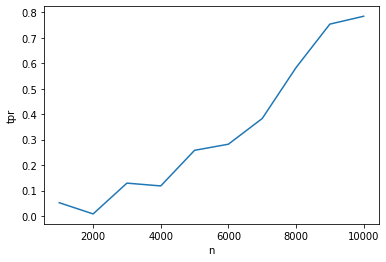

In [3]:
display(res)
sns.lineplot(data=res, x="n", y="tpr")